# LEAD SCORE CASE STUDY

### Step 1: Importing the required libraries


In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Step 2: Sourcing the data

In [3]:
lead_data = pd.read_csv("C:/Users/Dataset/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 3 : Anlaysing the data

In [4]:
#Finding the shape
print(lead_data.shape)

(9240, 37)


In [5]:
#Analysing the columns
print(lead_data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [6]:
#Inspecting the datatypes of variables
print(lead_data.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
#Information about the data
print(lead_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Finding out the  Mean,std,min,25%,50%,75%,max of the dataset
print(lead_data.describe()) 

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

### Step 4 : Cleaning the data

#### Replace all Select values in the dataframe with nan

In [9]:
#Finding out the columns with 'Select' variable in the data.
SelectColumns = lead_data.isin(["Select"]).any()
print(SelectColumns)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
#Replacing those values with 'nan'
lead_data.replace('Select',np.nan,inplace=True)

In [11]:
#Calculating the percentage of missing values in each column.
null = round(lead_data.isnull().sum() * 100 / len(lead_data),2)
print(null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
#Dropping all these variables in the dataframe because these are the data where the customer has been contated already.
lead_data.drop(['Tags','Lead Quality','Lead Profile','Last Notable Activity','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [13]:
#Recalculating the percentage of missing values in each column.
null = round(lead_data.isnull().sum() * 100 / len(lead_data),2)
print(null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
#Checking columns having null value greater than or equal to 35%
print(null[null >= 35])

Specialization                        36.58
How did you hear about X Education    78.46
City                                  39.71
dtype: float64


In [15]:
#Since, 'Specilisation' column is necessary we do not drop that column.
#Dropping the other two columns
lead_data = lead_data.drop(lead_data.loc[:,list((100*(lead_data.isnull().sum()/len(lead_data.index))>=38))].columns, 1)

#### Checking all the unique values for all categorical values

In [16]:
#Lead Origin
lead_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [17]:
#Lead Score
lead_data['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [18]:
#Do not email
lead_data['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [19]:
#Do not call
lead_data['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [20]:
#Last activity
lead_data['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [21]:
#Country
lead_data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [22]:
#Specialization
lead_data['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [23]:
#What is your current occupation
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [24]:
#What matters most to you in choosing a course
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
#Search
lead_data['Search'].value_counts(normalize=True) 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [26]:
#Magazine
lead_data['Magazine'].value_counts(normalize=True) 

No    1.0
Name: Magazine, dtype: float64

In [27]:
#Newspaper Article
lead_data['Newspaper Article'].value_counts(normalize=True) 

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [28]:
#X Education Forums
lead_data['X Education Forums'].value_counts(normalize=True) 

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [29]:
#Digital Advertisement
lead_data['Digital Advertisement'].value_counts(normalize=True) 

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [30]:
#Through Recommendations
lead_data['Through Recommendations'].value_counts(normalize=True) 

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [31]:
#Receive More Updates About Our Courses
lead_data['Receive More Updates About Our Courses'].value_counts(normalize=True) 

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [32]:
#Get updates on DM Content
lead_data['Get updates on DM Content'].value_counts(normalize=True) 

No    1.0
Name: Get updates on DM Content, dtype: float64

In [33]:
#Update me on Supply Chain Content
lead_data['Update me on Supply Chain Content'].value_counts(normalize=True) 

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [34]:
#I agree to pay the amount through cheque
lead_data['I agree to pay the amount through cheque'].value_counts(normalize=True) 

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [35]:
#A free copy of Mastering The Interview
lead_data['A free copy of Mastering The Interview'].value_counts(normalize=True) 

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

#### Dropping columns having high data imbalance

In [36]:
lead_data.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [37]:
#Recalculating the percentage of missing values in each column.
null = round(lead_data.isnull().sum() * 100 / len(lead_data),2)
print(null)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


#### Combining columns having low percentages into one single column.

In [38]:
#Lead Origin
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')
lead_data['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

In [39]:
#Lead Source
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')
lead_data['Lead Source'].value_counts(normalize=True) 

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [40]:
#Last Activity
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 
lead_data['Last Activity'].value_counts(normalize=True) 


Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [41]:
#Specialization
lead_data['Specialization'] = lead_data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others') 
lead_data['Specialization'].value_counts(normalize=True) 

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Others                               0.084642
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Name: Specialization, dtype: float64

In [42]:
#Current Occupation
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')
lead_data['What is your current occupation'].value_counts(normalize=True) 

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

#### Replacing null values mode for categorical variables and mean or median for numerical variables


#### Categorical Variables

In [43]:
#Replace missing values in 'Lead Source' with mode. 
lead_data['Lead Source'].fillna('Google',inplace=True)

In [44]:
#Replace missing values in 'Last Activity' with mode. 
lead_data['Last Activity'].fillna('Email Opened',inplace=True)

In [45]:
#Replace missing values in 'Unemployed in Current Occupation' with mode 
lead_data['What is your current occupation'].fillna('Unemployed', inplace = True)

#### Numerical Variables

In [46]:
#Identifying the mean and median for Total Visits
lead_data['TotalVisits'].describe()


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [47]:
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(),inplace=True)


In [48]:
#Identifying the mean and median for Page Views Per Visit
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [49]:
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(),inplace=True)

In [50]:
#Recalculating the percentage of missing values in each column.
null = round(lead_data.isnull().sum() * 100 / len(lead_data),2)
print(null)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            36.58
What is your current occupation            0.00
A free copy of Mastering The Interview     0.00
dtype: float64


In [51]:
#Handle the missing values for Specialisation column by adding another column known as "Not Specified" for all missing values.
lead_data.Specialization.fillna('Not Specified', inplace=True)

In [52]:
#Recalculating the percentage of missing values in each column.
null = round(lead_data.isnull().sum() * 100 / len(lead_data),2)
print(null)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


#### Checking for null rows

In [53]:
print(lead_data.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


In [54]:
#Checking for duplicates in the data.
lead_data.loc[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview


#### Inference : No duplicate data are present

### Step 5 : EDA Process


#### Univariate Analysis for categorical variables

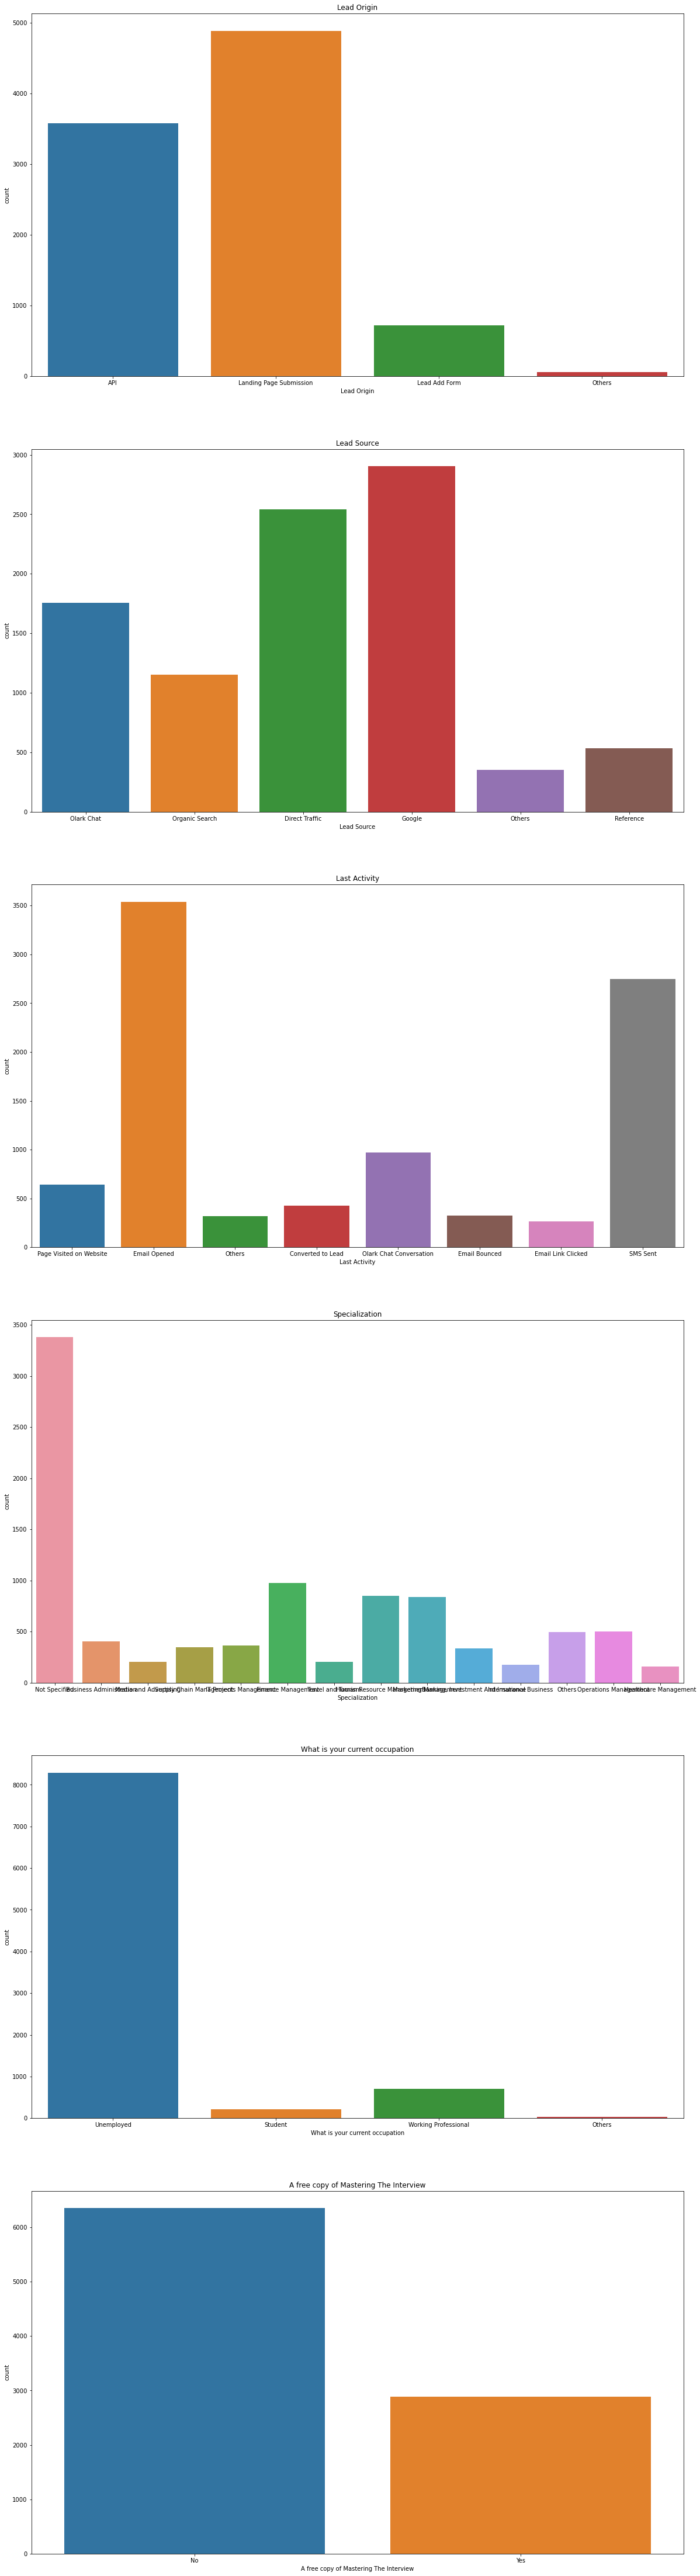

In [55]:
mpl.figure(figsize = (20,80))

mpl.subplot(6,1,1)
sb.countplot(lead_data['Lead Origin'])
mpl.title('Lead Origin')



mpl.subplot(6,1,2)
sb.countplot(lead_data['Lead Source'])
mpl.title('Lead Source')

mpl.subplot(6,1,3)
sb.countplot(lead_data['Last Activity'])
mpl.title('Last Activity')

mpl.subplot(6,1,4)
sb.countplot(lead_data['Specialization'])
mpl.title('Specialization')

mpl.subplot(6,1,5)
sb.countplot(lead_data['What is your current occupation'])
mpl.title('What is your current occupation')

mpl.subplot(6,1,6)
sb.countplot(lead_data['A free copy of Mastering The Interview'])
mpl.title('A free copy of Mastering The Interview')


mpl.show()

#### Inference:
#### i. Landing Page Submission has a greater percentage in converted people
#### ii. Google is one of the important source for Lead Conversion
#### iii. Probability of convertion is high when people are target through Email and SMS
#### iv. Target should be focused on Working professionals and Unemployed people


#### Univariate Analysis for numerical variables

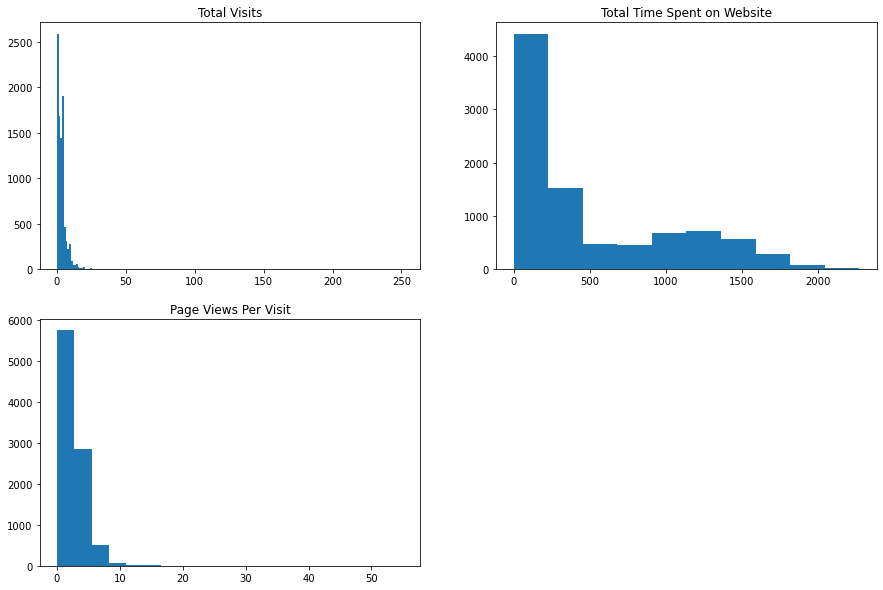

In [56]:
mpl.figure(figsize = (15,10))
mpl.subplot(2,2,1)
mpl.hist(lead_data['TotalVisits'], bins = 200)
mpl.title('Total Visits')


mpl.subplot(2,2,2)
mpl.hist(lead_data['Total Time Spent on Website'], bins = 10)
mpl.title('Total Time Spent on Website')

mpl.subplot(2,2,3)
mpl.hist(lead_data['Page Views Per Visit'], bins = 20)
mpl.title('Page Views Per Visit')

mpl.show()

#### Inference:
#### i. 'Total Visits' increases initially but decreases later.
#### ii. The maximum probability for PageViewsPerVisit is found to be around to be 3-5
#### iii. Probability of time spent on website is around 0-300 secs


#### Bivariate Analysis for numerical variables

#### Analysing with respect to target variable - 'converted'

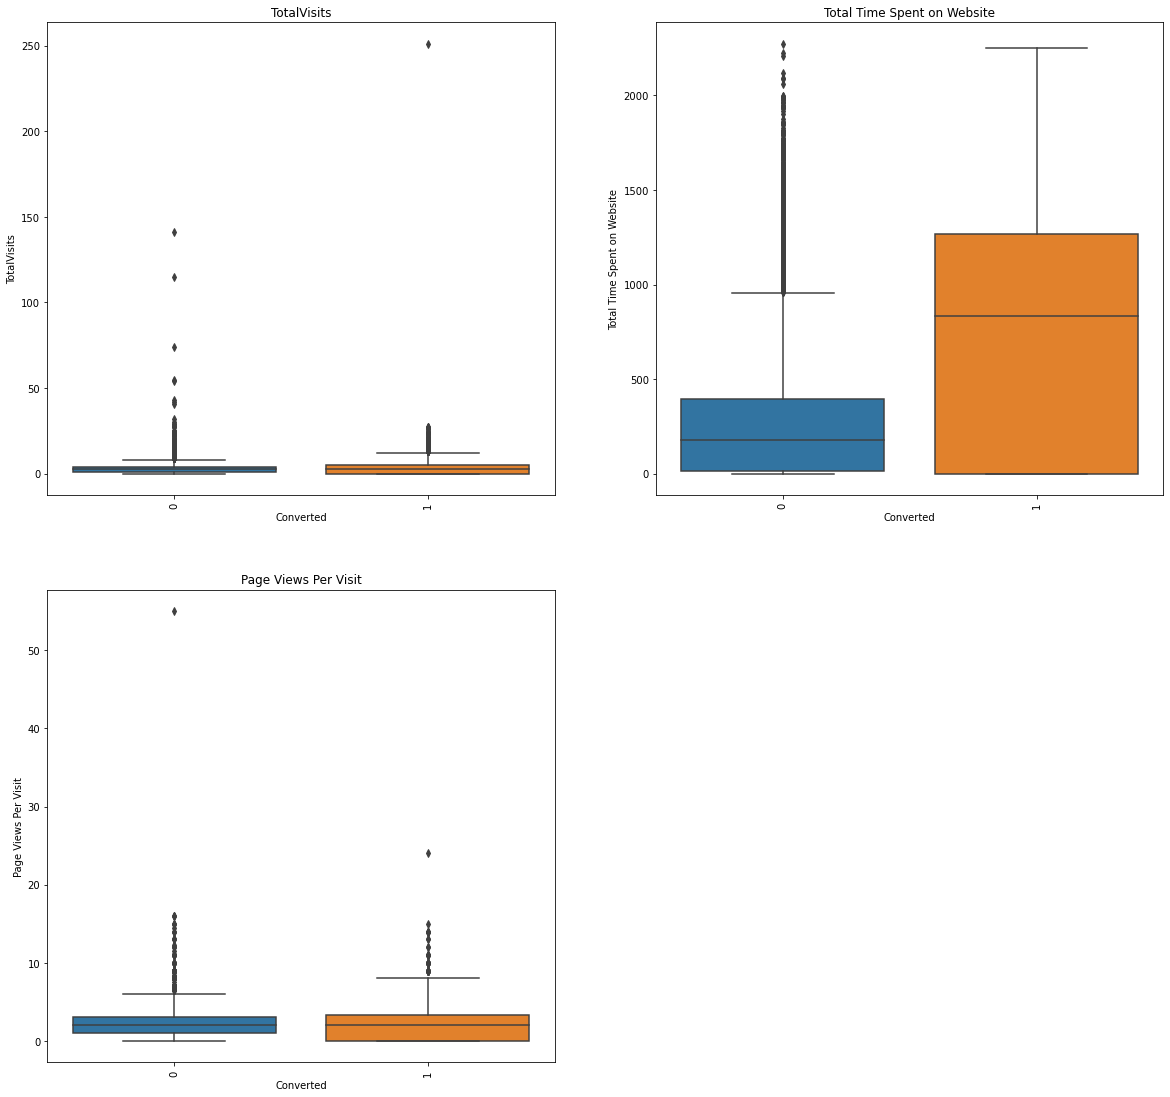

In [57]:
column_list= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
mpl.figure(figsize = (20, 40))

for c in enumerate(column_list):
    mpl.subplot(4, 2, c[0]+1)
    mpl.title(c[1])
    ax = sb.boxplot(x='Converted', y=c[1], data = lead_data)
    mpl.xticks(rotation = 90)

#### Inference:
#### i. The mean is found to be higher in case of Converted people rather than non-converted people.
#### ii. The average total visits for both converted and non converted people is found to be the same.
#### iii.The average page views for both converted and non converted is found to be the 

#### Outlier Handling 

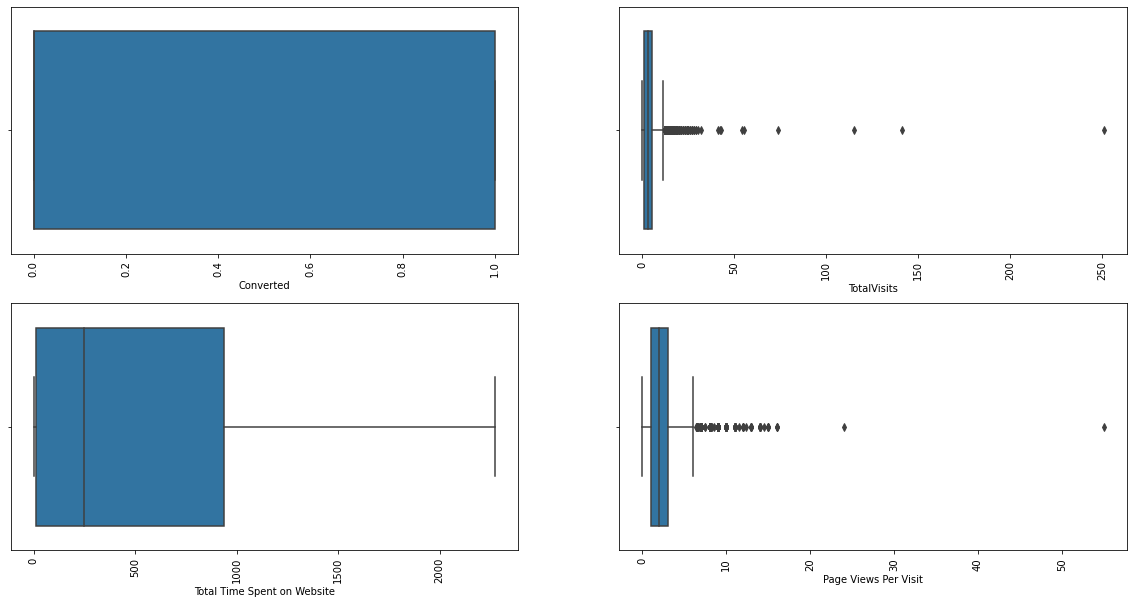

In [58]:
numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

mpl.figure(figsize = (20, 10))
for c in enumerate(numerical_columns):
    mpl.subplot(2,2, c[0]+1)
    sb.boxplot(x = c[1], data = lead_data)
    mpl.xticks(rotation = 90)
    

#### Inference : TotalVisits and Page Views Per Visit have outliers

In [59]:
#Capping the outliers
columns_list=['TotalVisits','Page Views Per Visit'] 
for col in columns_list:
    percentiles = lead_data[col].quantile(0.99)  ## capping higher range outliers
    lead_data[col][lead_data[col] >= percentiles] = percentiles

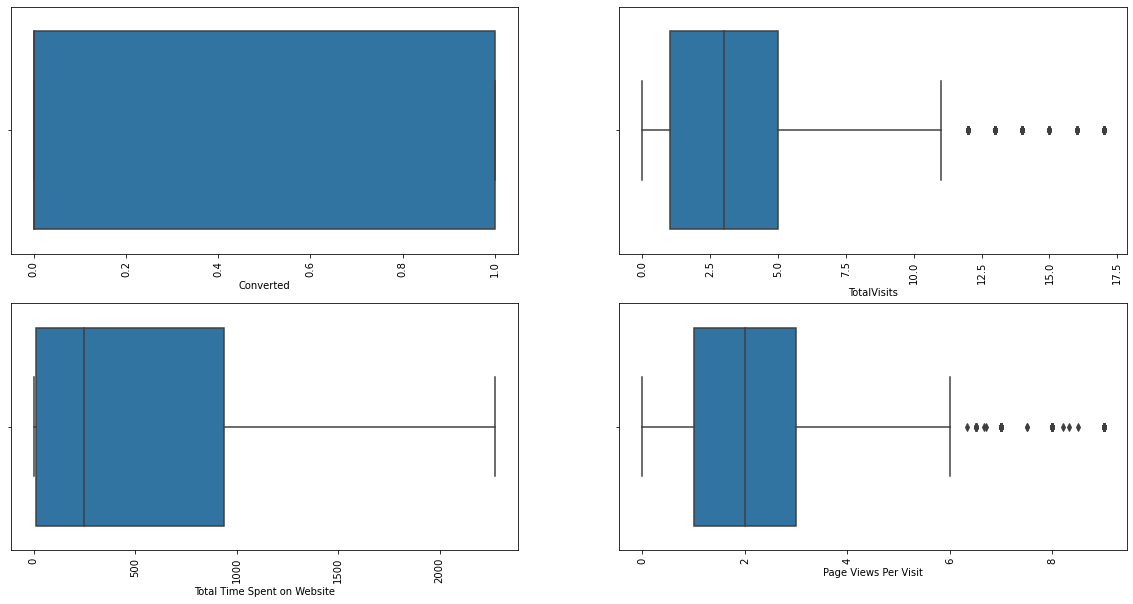

In [60]:
#Plotting the graphs again to check outliers 
mpl.figure(figsize = (20, 10))
for c in enumerate(numerical_columns):
    mpl.subplot(2,2, c[0]+1)
    sb.boxplot(x = c[1], data = lead_data)
    mpl.xticks(rotation = 90)

### Step 6 : Preparing the data

In [61]:
#Converting Yes/No columns to binary values 
Col_name =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

lead_data[Col_name] = lead_data[Col_name].apply(binary_map)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


In [62]:
#Renaming columns for easy analysis
lead_data.rename(columns={'Total Time Spent on Website' : 'Time Spent', 'What is your current occupation':'Current Occupation', 'A free copy of Mastering The Interview':'Free Copy'}, inplace=True )
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Time Spent', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Current Occupation', 'Free Copy'],
      dtype='object')

### Step 7 : Create dummy variables

In [63]:
#Creating dummmy variables for categorical variables and dropping the previous ones
dum = pd.get_dummies(lead_data[['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation']], drop_first=True)

In [64]:
#Merging this result with our data 
lead_data = pd.concat([lead_data, dum], axis=1)
lead_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,1,0,0,0,0,0,1,0


In [65]:
#Drop the original columns 
lead_data.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation'],axis=1,inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
#Checking the datatypes of the columns
lead_data.dtypes

Prospect ID                                  object
Lead Number                                   int64
Converted                                     int64
TotalVisits                                 float64
Time Spent                                    int64
Page Views Per Visit                        float64
Free Copy                                     int64
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Others                            uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Organic Search                    uint8
Lead Source_Others                            uint8
Lead Source_Reference                         uint8
Last Activity_Email Bounced                   uint8
Last Activity_Email Link Clicked              uint8
Last Activity_Email Opened                    uint8
Last Activity_Olark Chat Conversation         uint8
Last Activit

### Step 8 : Test Train Data Split Process

In [67]:
#Required features are added into X 
X = lead_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)
X.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
#Adding the target variable into y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
#Splitting the data into train and test (70-30)%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X.head()


,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [70]:
#Scaling the features which are not in 0-1 range
scale = StandardScaler()
X_train[['TotalVisits','Time Spent','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Time Spent','Page Views Per Visit']])
X_train.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8105,0.512365,1.365219,1.364995,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [71]:
#Check the standard deviation and mean for X train data
X_train.describe()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005257,0.320037,0.190167,0.121058,...,0.093383,0.020563,0.367502,0.057205,0.055040,0.037570,0.021336,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466527,0.392463,0.326219,...,0.290991,0.141926,0.482162,0.232251,0.228076,0.190168,0.144512,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Inference : Standard deviation is 1

In [72]:
#Checking the Converted Rate before modelling
Convert_Rate = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Convert_Rate

38.53896103896104

#### Inference : Before building the models, the convertion rate is 38.5%

### Step 9 : Building Models

### Model -1

In [73]:
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model1.fit()
print(model1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.3
Date:                Fri, 11 Nov 2022   Deviance:                       5374.6
Time:                        23:31:44   Pearson chi2:                 7.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### Inference : We have 35 columns for analysis 

In [74]:
# Using RFE, lets select only 20 features
lr = LogisticRegression()
rfe = RFE(lr, 20) 
rfe = rfe.fit(X_train, y_train)

In [75]:
#Listing the 20 selected features with its ranking and storing it in col variable
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]

### Model -2

In [76]:
X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
print(res.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.7
Date:                Fri, 11 Nov 2022   Deviance:                       5415.5
Time:                        23:31:46   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [77]:
# Creating a dataframe to store all the feature variables with their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Current Occupation_Unemployed,18.14
3,Lead Origin_Landing Page Submission,7.74
4,Lead Origin_Lead Add Form,6.88
8,Lead Source_Reference,6.19
16,Specialization_Not Specified,4.87
11,Last Activity_Email Opened,4.26
14,Last Activity_SMS Sent,3.66
6,Lead Source_Olark Chat,2.66
19,Current Occupation_Working Professional,2.33
12,Last Activity_Olark Chat Conversation,2.24


#### Inference:
#### i. Lead Source_Others - has a P-value of 56.3%. which is a high values, hence we can drop it
#### ii. Further reducing the number of columns


In [78]:
#Droppping Lead Source_Others column
col = col.drop('Lead Source_Others')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

### Model - 3

In [79]:
#Re-building the model
X_train_sm = sm.add_constant(X_train[col])
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.9
Date:                Fri, 11 Nov 2022   Deviance:                       5415.8
Time:                        23:31:46   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [80]:
#Re-creating the VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Current Occupation_Unemployed,18.10
3,Lead Origin_Landing Page Submission,7.73
15,Specialization_Not Specified,4.84
4,Lead Origin_Lead Add Form,4.75
7,Lead Source_Reference,4.44
10,Last Activity_Email Opened,4.26
13,Last Activity_SMS Sent,3.65
6,Lead Source_Olark Chat,2.63
18,Current Occupation_Working Professional,2.33
11,Last Activity_Olark Chat Conversation,2.24


#### Inference :
#### i. Lead Origin_Others - has a P-value of 40.0%. We can drop this column.

In [81]:
col = col.drop('Lead Origin_Others')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

### Model-4

In [82]:
#Building the 4th model
X_train_sm = sm.add_constant(X_train[col])
model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.3
Date:                Fri, 11 Nov 2022   Deviance:                       5416.6
Time:                        23:31:46   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [83]:
#Building the VIF dataframe for this model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Current Occupation_Unemployed,17.99
3,Lead Origin_Landing Page Submission,7.65
14,Specialization_Not Specified,4.84
4,Lead Origin_Lead Add Form,4.73
6,Lead Source_Reference,4.44
9,Last Activity_Email Opened,4.25
12,Last Activity_SMS Sent,3.65
5,Lead Source_Olark Chat,2.59
17,Current Occupation_Working Professional,2.32
10,Last Activity_Olark Chat Conversation,2.24


#### Inference:
#### i. Dropping Current Occupation_Student since it has a P-value of 32.47%.

In [84]:
col = col.drop('Current Occupation_Student')
print(col)

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')


### Model-5

In [85]:
#Building the 5th model
X_train_sm = sm.add_constant(X_train[col])
model5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Fri, 11 Nov 2022   Deviance:                       5417.6
Time:                        23:31:47   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [86]:
#Buiding VIF model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Current Occupation_Unemployed,12.91
3,Lead Origin_Landing Page Submission,6.52
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
14,Specialization_Not Specified,4.21
9,Last Activity_Email Opened,3.84
12,Last Activity_SMS Sent,3.40
5,Lead Source_Olark Chat,2.54
2,Free Copy,2.20
10,Last Activity_Olark Chat Conversation,2.14


#### Inference : We can remove Specialization International_Business since it has high P value 

In [87]:
col = col.drop('Specialization_International Business')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

### Model - 6

In [88]:
#Building the 6th model
X_train_sm = sm.add_constant(X_train[col])
model6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.9
Date:                Fri, 11 Nov 2022   Deviance:                       5419.9
Time:                        23:31:47   Pearson chi2:                 8.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [89]:
#Creating the 6th dataframe of VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,Current Occupation_Unemployed,12.90
3,Lead Origin_Landing Page Submission,6.52
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
13,Specialization_Not Specified,4.20
9,Last Activity_Email Opened,3.83
12,Last Activity_SMS Sent,3.40
5,Lead Source_Olark Chat,2.54
2,Free Copy,2.20
10,Last Activity_Olark Chat Conversation,2.14


#### Inference : Last Activity_Email Link Clicked - has a P-value of 11.5%. 

In [90]:
#Dropping Last Activity_Email Link Clicked column
col = col.drop('Last Activity_Email Link Clicked')
col


Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

### Model - 7

In [91]:
#Building the 7th model
X_train_sm = sm.add_constant(X_train[col])
model7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.1
Date:                Fri, 11 Nov 2022   Deviance:                       5422.3
Time:                        23:31:47   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [92]:
#Creating a database of VIF for this model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Current Occupation_Unemployed,12.20
3,Lead Origin_Landing Page Submission,6.49
4,Lead Origin_Lead Add Form,4.72
6,Lead Source_Reference,4.40
12,Specialization_Not Specified,4.18
8,Last Activity_Email Opened,3.32
11,Last Activity_SMS Sent,2.98
5,Lead Source_Olark Chat,2.51
2,Free Copy,2.20
9,Last Activity_Olark Chat Conversation,1.95


#### Inference : Current occupation_Unemployed has a high VIF of 12.20 and we need to drop this column.

In [93]:
#Dropping the columns
col = col.drop('Current Occupation_Unemployed')
col

Index(['TotalVisits', 'Time Spent', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Working Professional'],
      dtype='object')

### Model-8

In [94]:
#Building the 8th model
X_train_sm = sm.add_constant(X_train[col])
model8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.0
Date:                Fri, 11 Nov 2022   Deviance:                       5428.0
Time:                        23:31:47   Pearson chi2:                 8.15e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [95]:
#Building the dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.66
6,Lead Source_Reference,4.36
3,Lead Origin_Landing Page Submission,3.99
8,Last Activity_Email Opened,2.68
12,Specialization_Not Specified,2.68
11,Last Activity_SMS Sent,2.48
5,Lead Source_Olark Chat,2.39
2,Free Copy,2.16
9,Last Activity_Olark Chat Conversation,1.82
0,TotalVisits,1.45


#### Inference : Since both VIF and P- values are < 5%, we can conclude that MODEL 8 is the final model

### Step 10 : Predicting Y values from the final model


In [96]:
#Obtaining the predicted values on the train set and reshaping it
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)

In [97]:
##Creating a data frame with the actual Converted score and Probability of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,0,0.458895,1871
1,0,0.064739,6795
2,0,0.310168,3516
3,0,0.798414,8105
4,0,0.213689,3934


In [98]:
#Mapping of the prediction conversion Rate according to the probability mark.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,0,0.458895,1871,0
1,0,0.064739,6795,0
2,0,0.310168,3516,0
3,0,0.798414,8105,1
4,0,0.213689,3934,0


### Step 11 : Metrics calculation for the final model

In [99]:
# Confusion matrix - Final Model 
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(conf)

[[3578  424]
 [ 811 1655]]


In [100]:
#Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8090599876314162


In [101]:
#Calculation of Final Model characteristics.
# true positive 
TP = conf[1,1] 
# true negatives
TN = conf[0,0] 
# false positives
FP = conf[0,1] 
# false negatives
FN = conf[1,0] 

In [102]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6711273317112734

In [103]:
#specificity of our logistic regression model
TN / float(TN+FP)

0.8940529735132434

In [104]:
#Calculating false postive rate 
print(FP/ float(TN+FP))

0.10594702648675662


In [105]:
#Calculating the negative predictive value
print (TN / float(TN+ FN))

0.8152198678514468


### Step 12 : ROC Curve and its parameters


In [106]:
#Plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    mpl.figure(figsize=(5, 5))
    mpl.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    mpl.plot([0, 1], [0, 1], 'k--')
    mpl.xlabel('False Positive Rate or [1 - True Negative Rate]')
    mpl.ylabel('True Positive Rate')
    mpl.title('Receiver operating characteristic example')
    mpl.legend(loc="lower right")
    mpl.show()

    return None

In [107]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

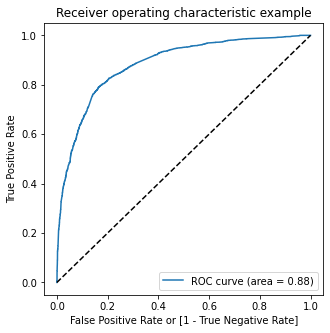

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [109]:
#Create columns with different probability cutoffs 
numb = [float(x)/10 for x in range(10)]
for i in numb:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.458895,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.064739,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.310168,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.798414,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.213689,3934,0,1,1,1,0,0,0,0,0,0,0


In [110]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
n= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in n:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.599567  0.972425  0.369815
0.2   0.2  0.724799  0.925385  0.601199
0.3   0.3  0.798392  0.838200  0.773863
0.4   0.4  0.818027  0.777778  0.842829
0.5   0.5  0.809060  0.671127  0.894053
0.6   0.6  0.797619  0.596918  0.921289
0.7   0.7  0.780767  0.513382  0.945527
0.8   0.8  0.756957  0.414031  0.968266
0.9   0.9  0.708565  0.252636  0.989505


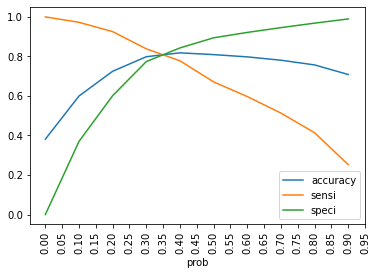

<Figure size 792x792 with 0 Axes>

In [111]:
#Plotting accuracy sensitivity and specificity 
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
mpl.xticks(np.arange(0, 1, step=0.05), rotation = 90)
mpl.figure(figsize=(11,11))
mpl.show()

#### Inference : Calculation of predicted values on the score : 0.35

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.458895,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.064739,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.310168,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.798414,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.213689,3934,0,1,1,1,0,0,0,0,0,0,0,0


### Step 13 : Calculating metrics after choosing the cut off

In [113]:
#Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119975262832406

In [114]:
#Confusion matrix after probability cutoff = 0.35 
conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf2

array([[3268,  734],
       [ 482, 1984]], dtype=int64)

In [115]:
#Calculation of parameters
# true positive 
TP = conf[1,1] 
# true negatives
TN = conf[0,0] 
# false positives
FP = conf[0,1] 
# false negatives
FN = conf[1,0] 

In [116]:
#Sensitivity 
TP / float(TP+FN)

0.6711273317112734

In [117]:
#Specificity
TN / float(TN+FP)

0.8940529735132434

In [118]:
#Calculate false postive rate = predicting conversion rate if customer will be a hot lead or not
print(FP/ float(TN+FP))

0.10594702648675662


In [119]:
#Positive predictive value 
print (TP / float(TP+FP))

0.796055796055796


In [120]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8152198678514468


#### Inference:
#### 1.ACCURACY - 81.19%
#### 2.SENSITIVITY - 67.11%
#### 3.SPECIFICITY - 89.40% 

### Step 14 : Model evaluation on TEST set

In [121]:
#Performing scaling on the available features.
X_test[['TotalVisits','Time Spent','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Time Spent','Page Views Per Visit']])

In [122]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Time Spent,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
4269,1.433341,0.964504,0,0,0,0,0,0,0,0,0,1,1,0
2376,-1.022595,-0.885371,0,0,1,0,1,0,0,0,0,1,1,0
7766,0.512365,-0.777416,0,0,0,0,0,0,0,0,1,0,0,1
9199,-1.022595,-0.885371,0,0,0,1,0,0,0,1,0,0,1,0
4359,-1.022595,-0.885371,0,0,1,0,1,0,1,0,0,0,0,0


### Step 15 : Building models on TEST set


In [123]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [124]:
#y_test_pred -> X_test_sm has all the features after model building
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.733731
2376    0.858812
7766    0.826093
9199    0.057037
4359    0.864181
9186    0.559817
1631    0.465935
8963    0.139994
8007    0.085739
5324    0.307222
dtype: float64

### Step 16 : Creating a dataframe for the predicted values



In [125]:
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.733731
2376,0.858812
7766,0.826093
9199,0.057037
4359,0.864181


In [126]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
#Removing the index of the dataframes to append them together
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.733731
1,1,0.858812
2,1,0.826093
3,0,0.057037
4,1,0.864181


In [128]:
#Renaming the column and predicting the test model
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.733731,1
1,1,0.858812,1
2,1,0.826093,1
3,0,0.057037,0
4,1,0.864181,1


### Step 17 : Calculation of Model Evaluation parameters

In [129]:
#Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8008658008658008

In [130]:
#Confusion metrics
confTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confTest

array([[1348,  329],
       [ 223,  872]], dtype=int64)

In [131]:
#Calculation of parameters
# true positive 
TP = conf[1,1] 
# true negatives
TN = conf[0,0] 
# false positives
FP = conf[0,1] 
# false negatives
FN = conf[1,0] 

In [132]:
#Sensitivity 
TP / float(TP+FN)


0.6711273317112734

In [133]:
#Specificity
TN / float(TN+FP)

0.8940529735132434

#### Inference :
#### ACCURACY - SPECIFICITY - SENSITIVITY

#### i.ACCURACY - 80.08%
#### ii.SENSITIVITY - 67.11%
#### iii.SPECIFICITY - 89.40%

### Since the difference between the test and train data parameters is 0.5 to 1% , we can conclude that our model doesnt over-fit the training model

### Step 18 : Listing the conclusions 

#### 1. Focus should be more on The total time spend on the Website, Total number of visits, lead source
#### 2. Lead source that are important are -
####  a. Google
####  b. Direct traffic
####  c. Organic search
#### d. Welingak website
#### 3. When the last activity was:
####  a. SMS
####  b. Olark chat conversation